# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2023

Мягий дедлайн: 23:59 12.12.2023

Жестокий дедлайн: 23:59 14.12.2023

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/56884/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3, n_redundant=0., )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

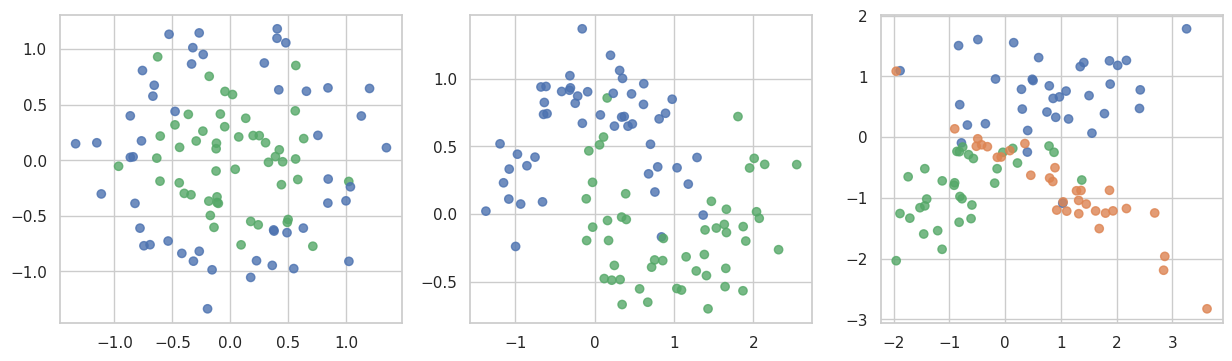

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

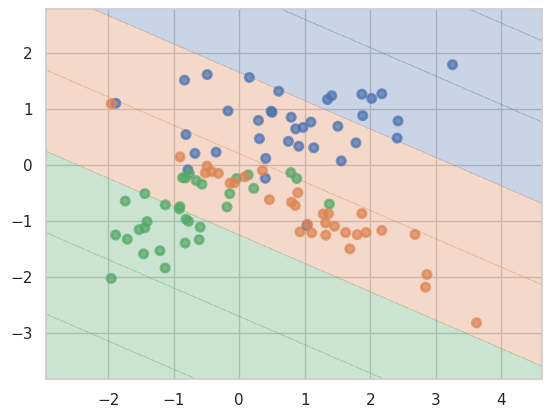

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Dataset n.1
Accuracy on train: 1.0000
Accurasy on test: 0.7667

Dataset n.2
Accuracy on train: 1.0000
Accurasy on test: 0.8667

Dataset n.3
Accuracy on train: 1.0000
Accurasy on test: 0.8333



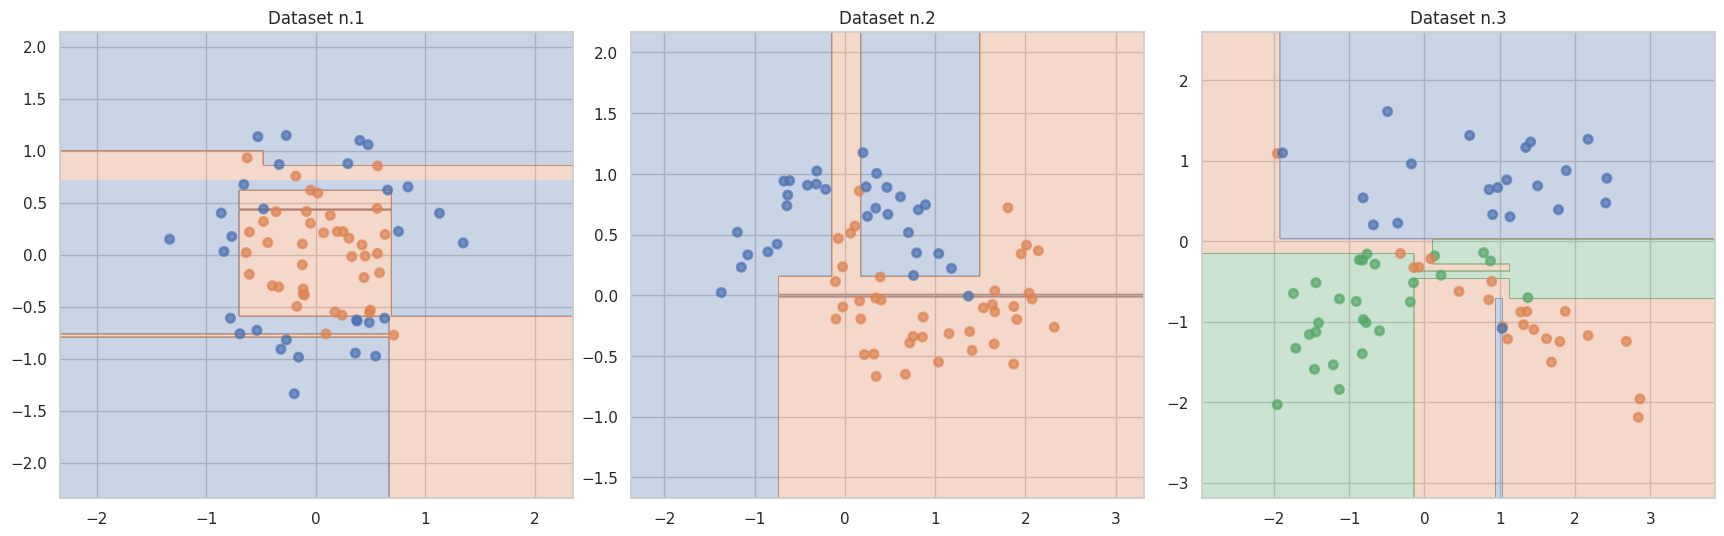

In [7]:
from sklearn.metrics import accuracy_score


fig = plt.figure(figsize=(18, 6))

for i in range(len(datasets)):
    X, y = datasets[i]
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = DecisionTreeClassifier().fit(x_train, y_train)

    plt.subplot(1, 3, i + 1)
    plot_surface(model, x_train, y_train)
    plt.title(f"Dataset n.{i + 1}")

    train_acc = accuracy_score(y_train, model.predict(x_train))
    test_acc = accuracy_score(y_test, model.predict(x_test))
    print(f"Dataset n.{i + 1}\nAccuracy on train: {train_acc:.4f}\nAccurasy on test: {test_acc:.4f}\n")

plt.show()

**Ответ: Судя по идеальному accurasy на обучающей выборке и нарисованным разделяющим плоскостям деревья полностью переобучились, подогнав все ответы даже под одиночные объекты.**

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

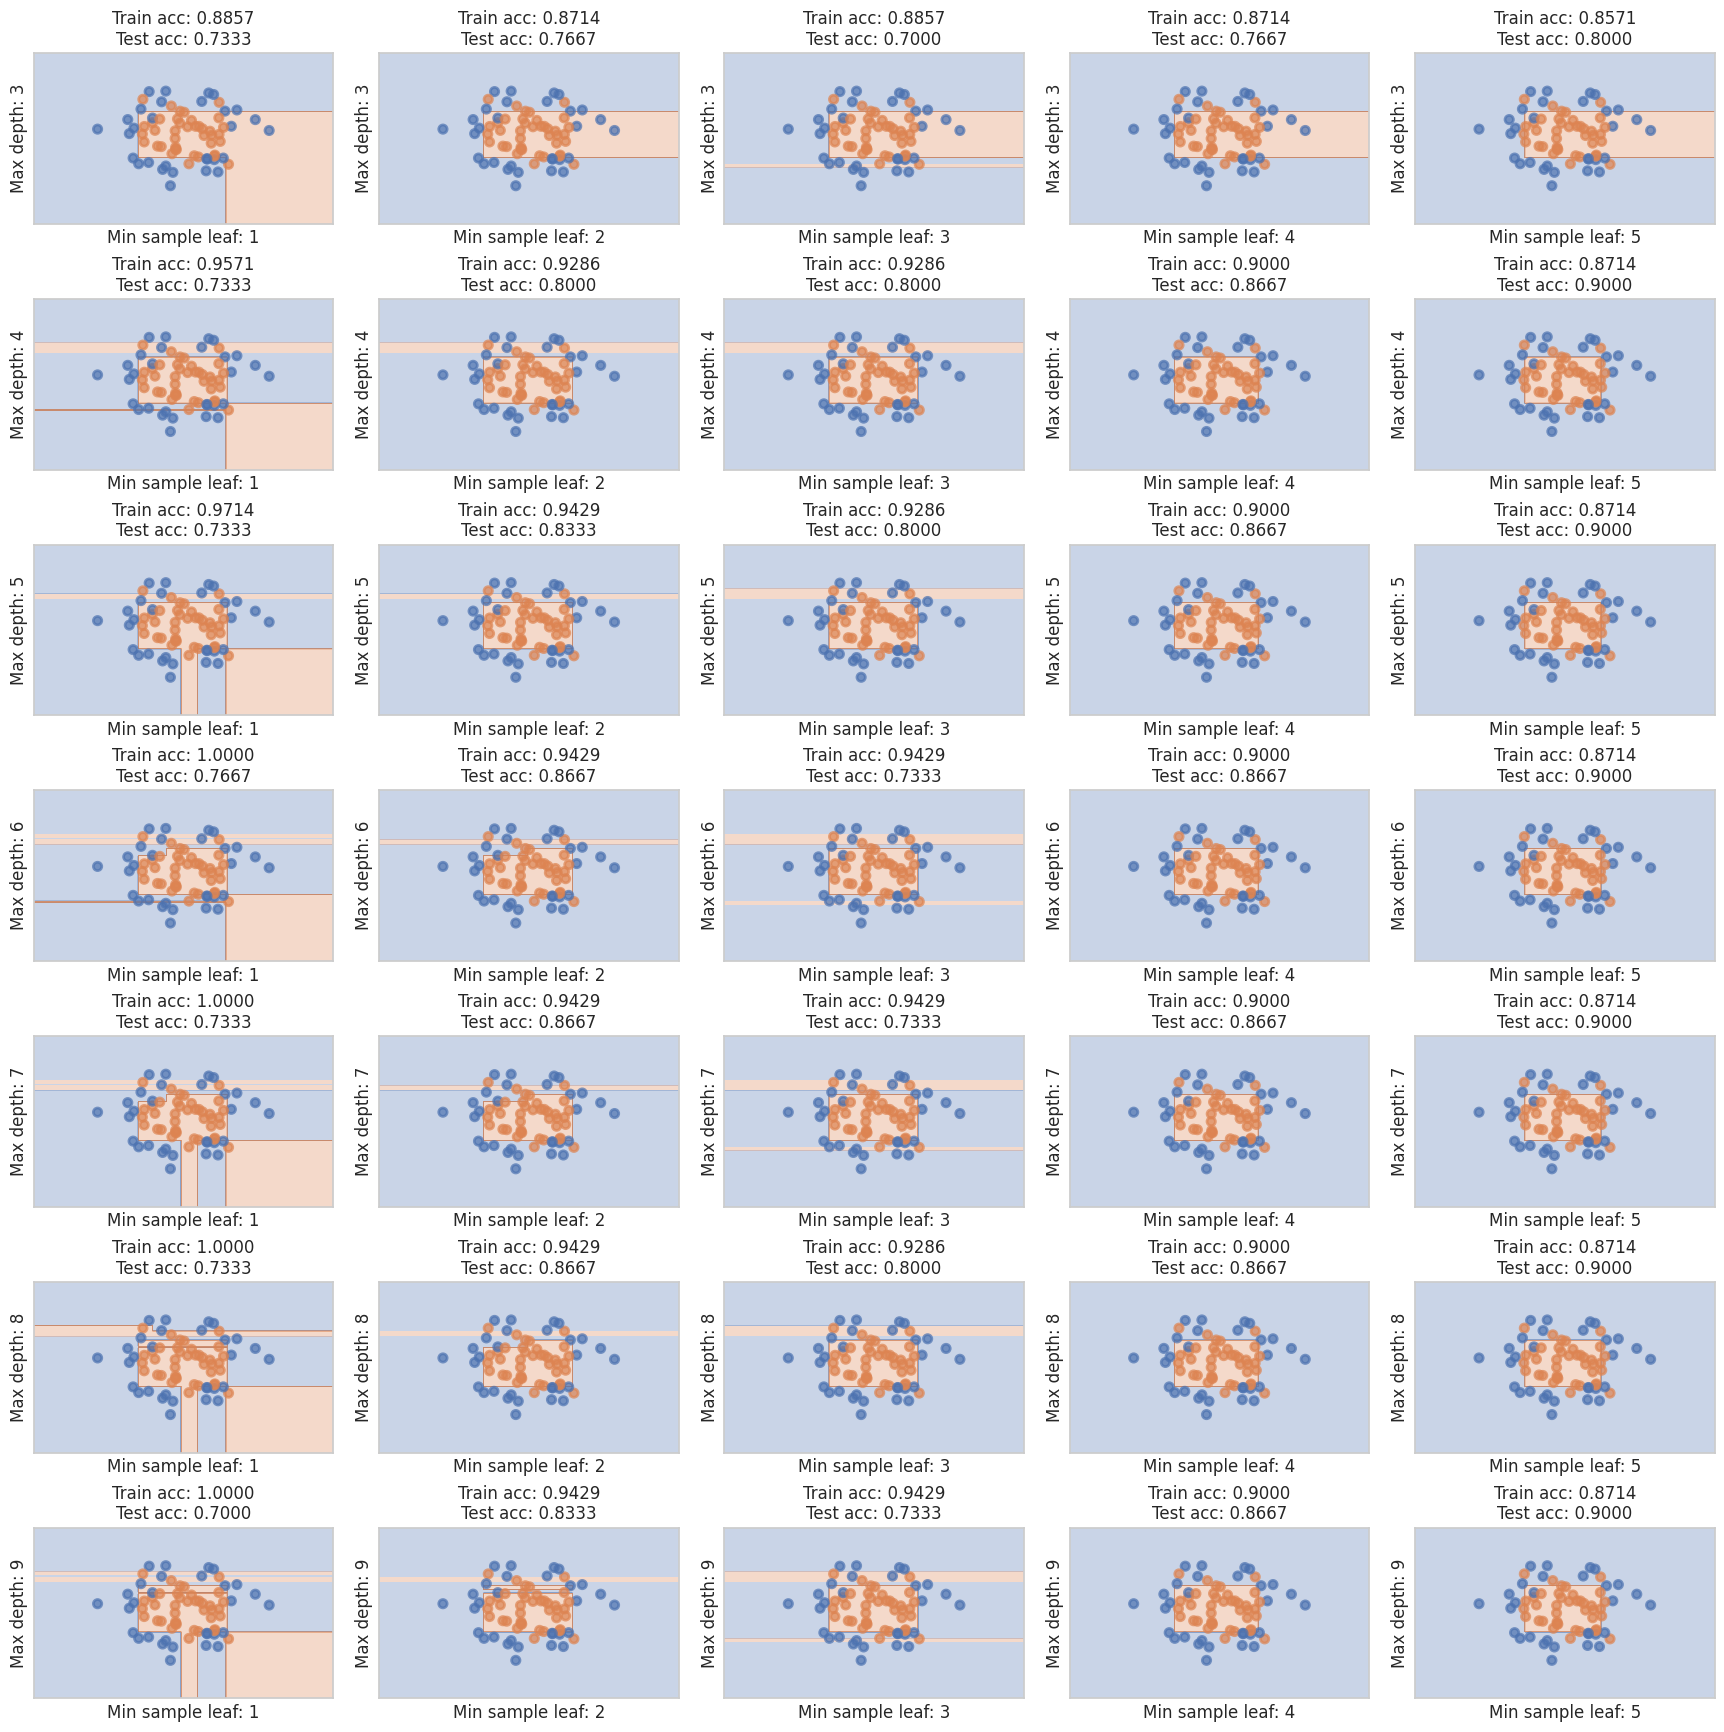

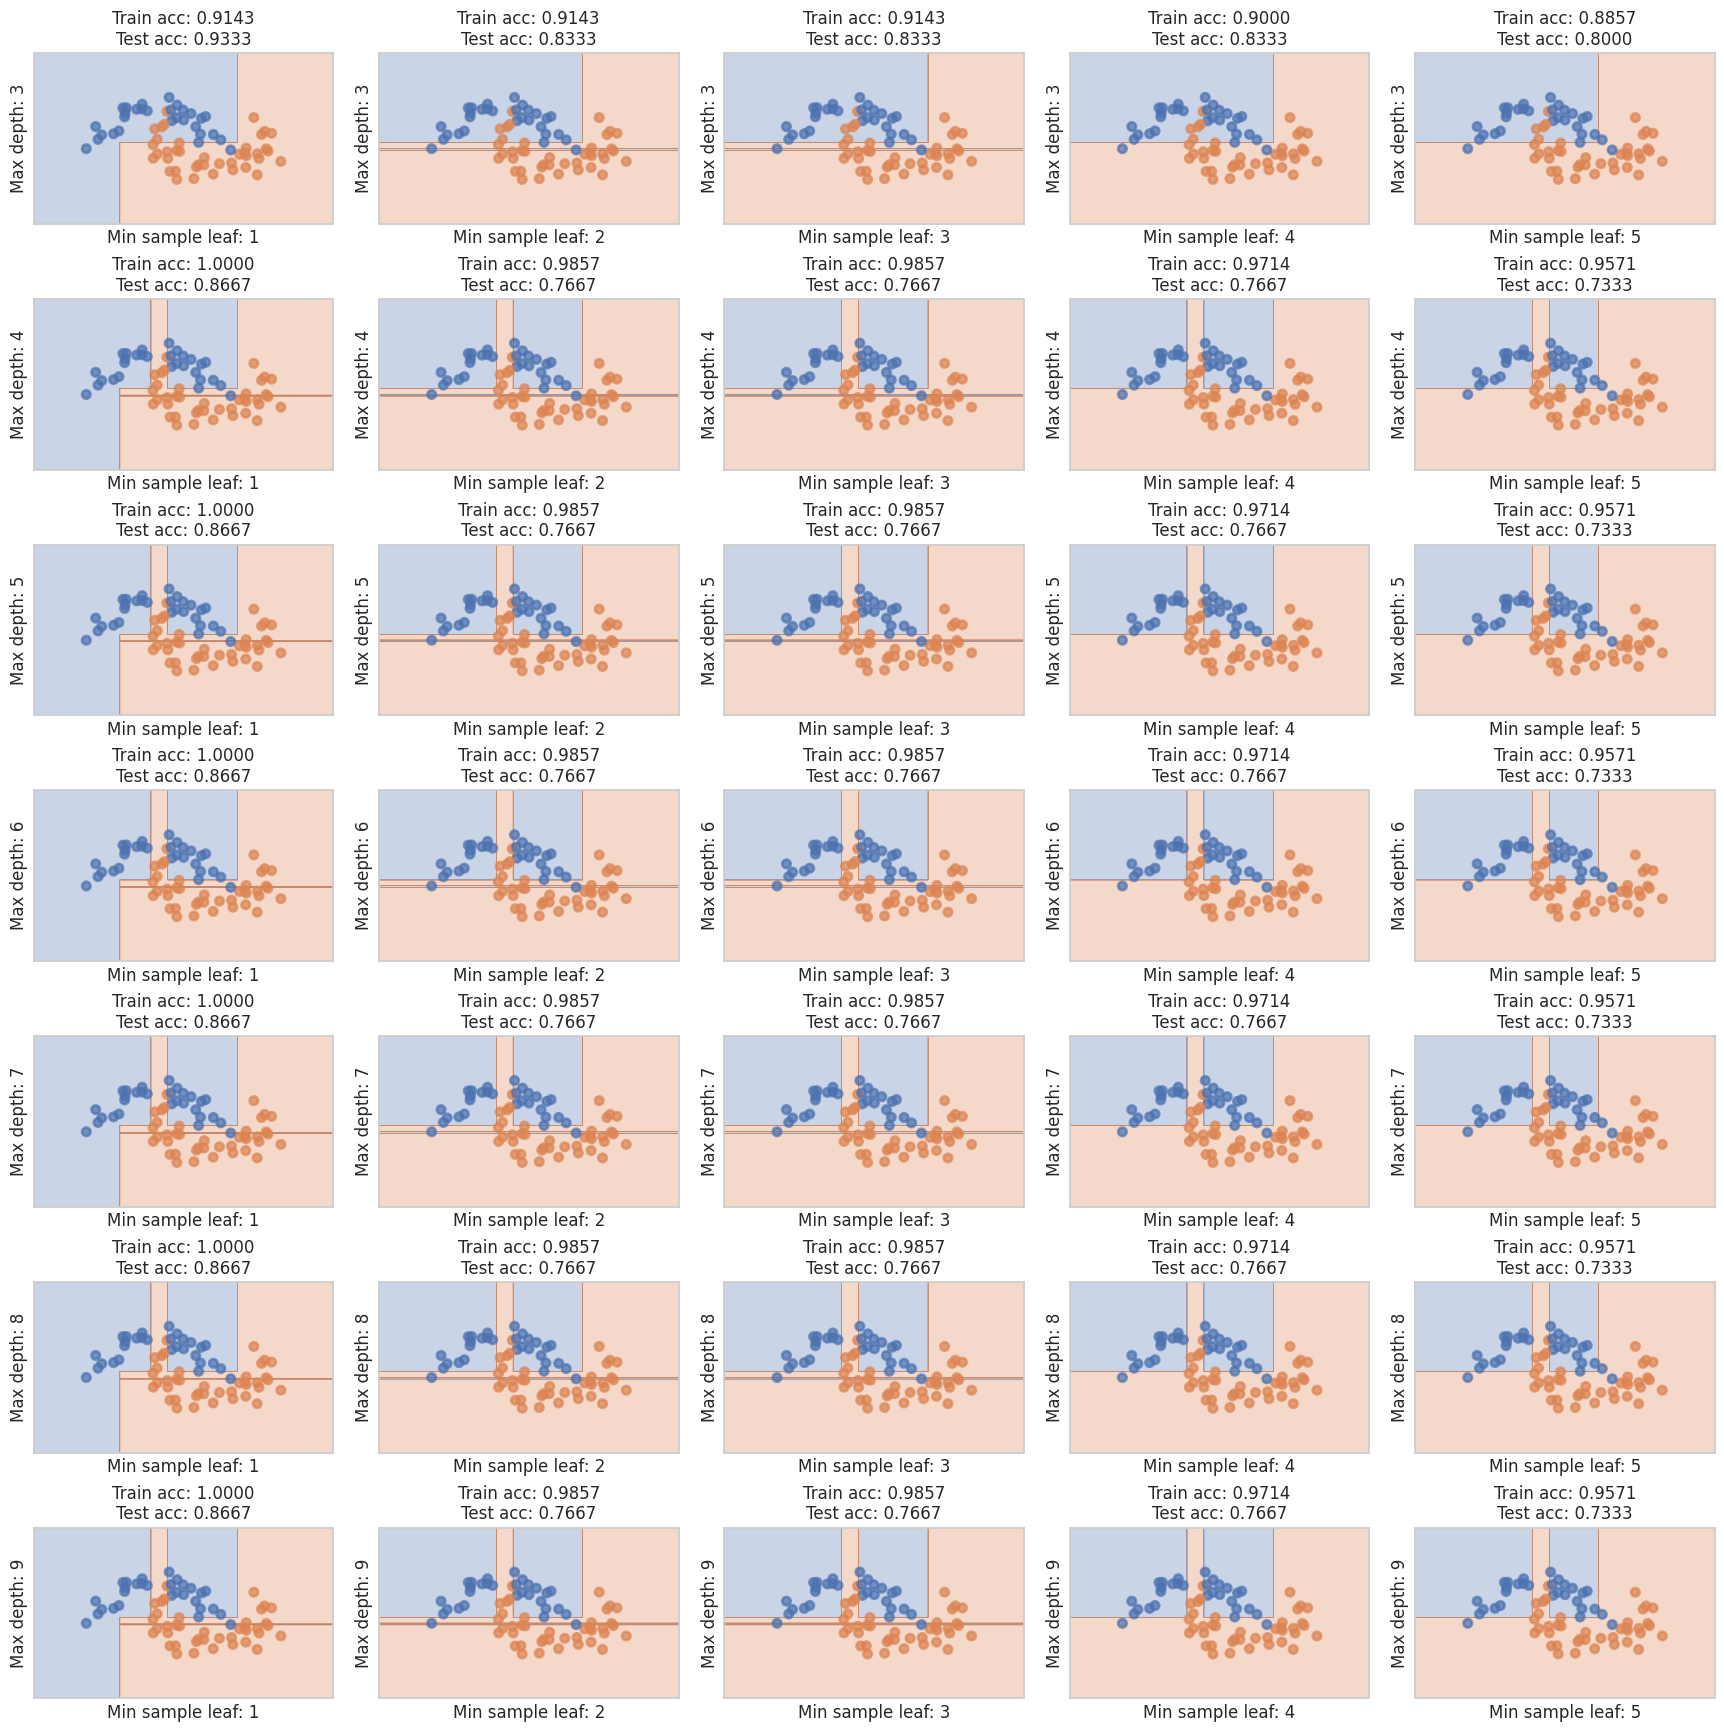

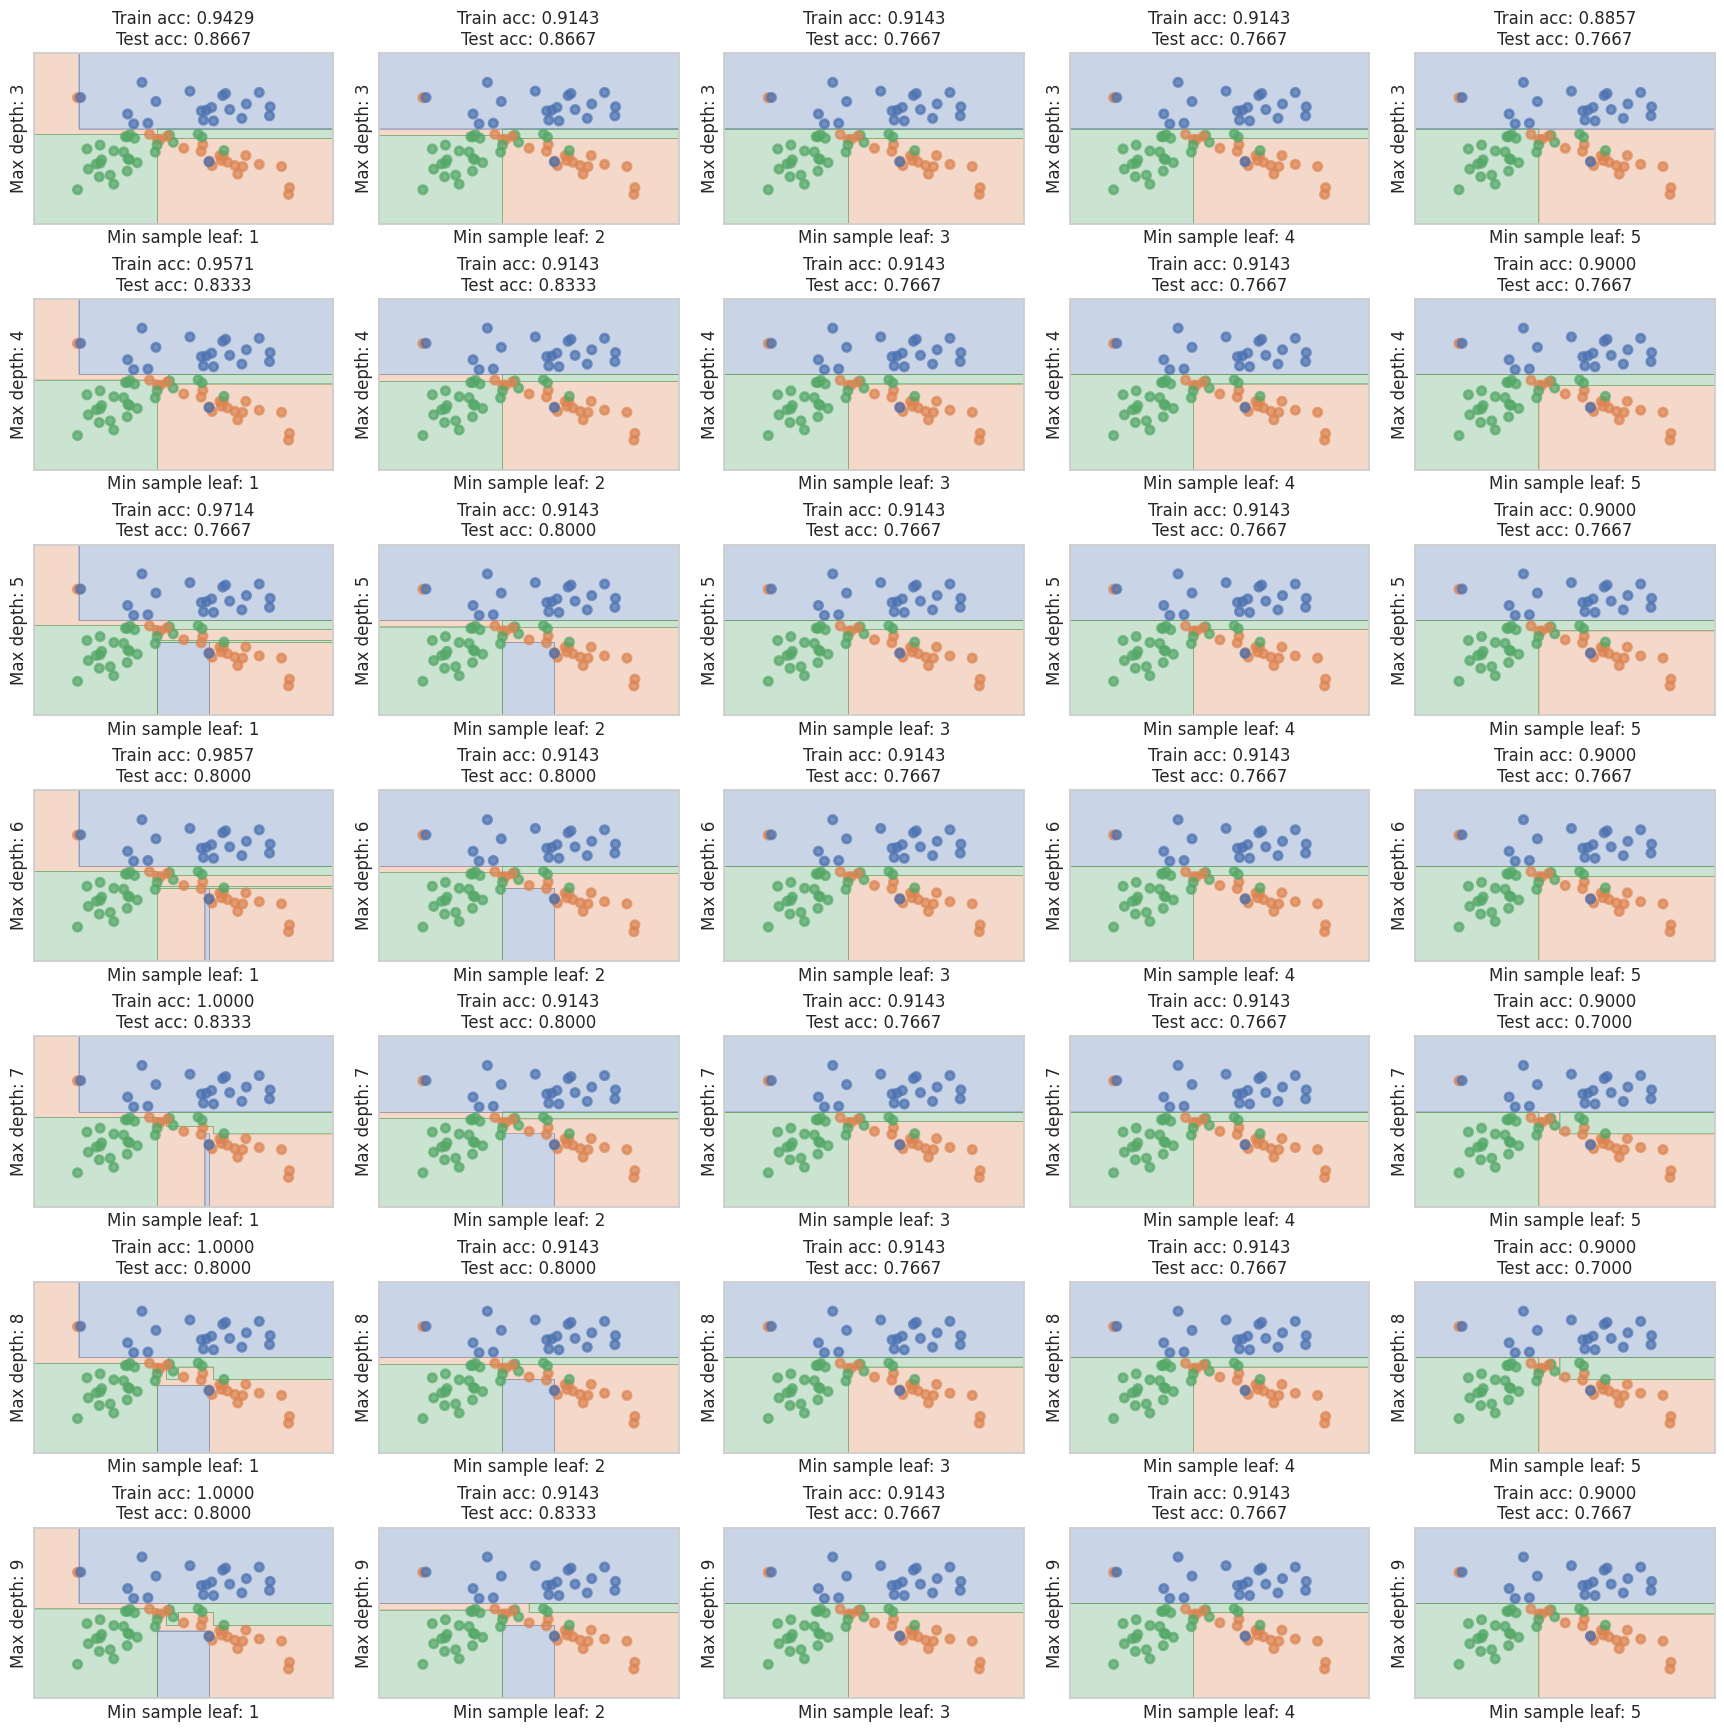

In [8]:
import numpy as np


max_depths = np.arange(3, 10)
min_sample_leafs = np.arange(1, 6)


for i in range(len(datasets)):
    fig = plt.figure(figsize=(18, 18))

    X, y = datasets[i]
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    for i in range(len(max_depths)):
        for j in range(len(min_sample_leafs)):
            model = DecisionTreeClassifier(max_depth=max_depths[i], min_samples_leaf=min_sample_leafs[j]).fit(x_train, y_train)
            train_acc = accuracy_score(y_train, model.predict(x_train))
            test_acc = accuracy_score(y_test, model.predict(x_test))

            plt.subplot(len(max_depths), len(min_sample_leafs), i * len(min_sample_leafs) + j + 1)
            plot_surface(model, x_train, y_train)
            plt.xticks([])
            plt.yticks([])
            plt.title(f"Train acc: {train_acc:.4f}\nTest acc: {test_acc:.4f}")
            plt.xlabel(f"Min sample leaf: {min_sample_leafs[j]}")
            plt.ylabel(f"Max depth: {max_depths[i]}")

    plt.show()
    print("\n\n\n\n\n\n\n\n")

**Ответ: Глубина дерева и минимальное количество объектов в листьях соответственно прямо и обратно пропорционально влияют на то, как хорошо будет построена разделяющая плоскость. Чем больше глубина и меньше количество объектов в листьях, тем больше мы получаем переобучение и подгонку под каждый из отдельных объектов на выборке. Если пойти в обратную сторону, то результат улучшается и становится более обобщенным. Общий тренд на всех датасетах совпадает с этими выводами, на первом видно лучше всего.**

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [9]:
data = pd.read_csv('https://raw.githubusercontent.com/esokolov/ml-course-hse/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv')
data.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


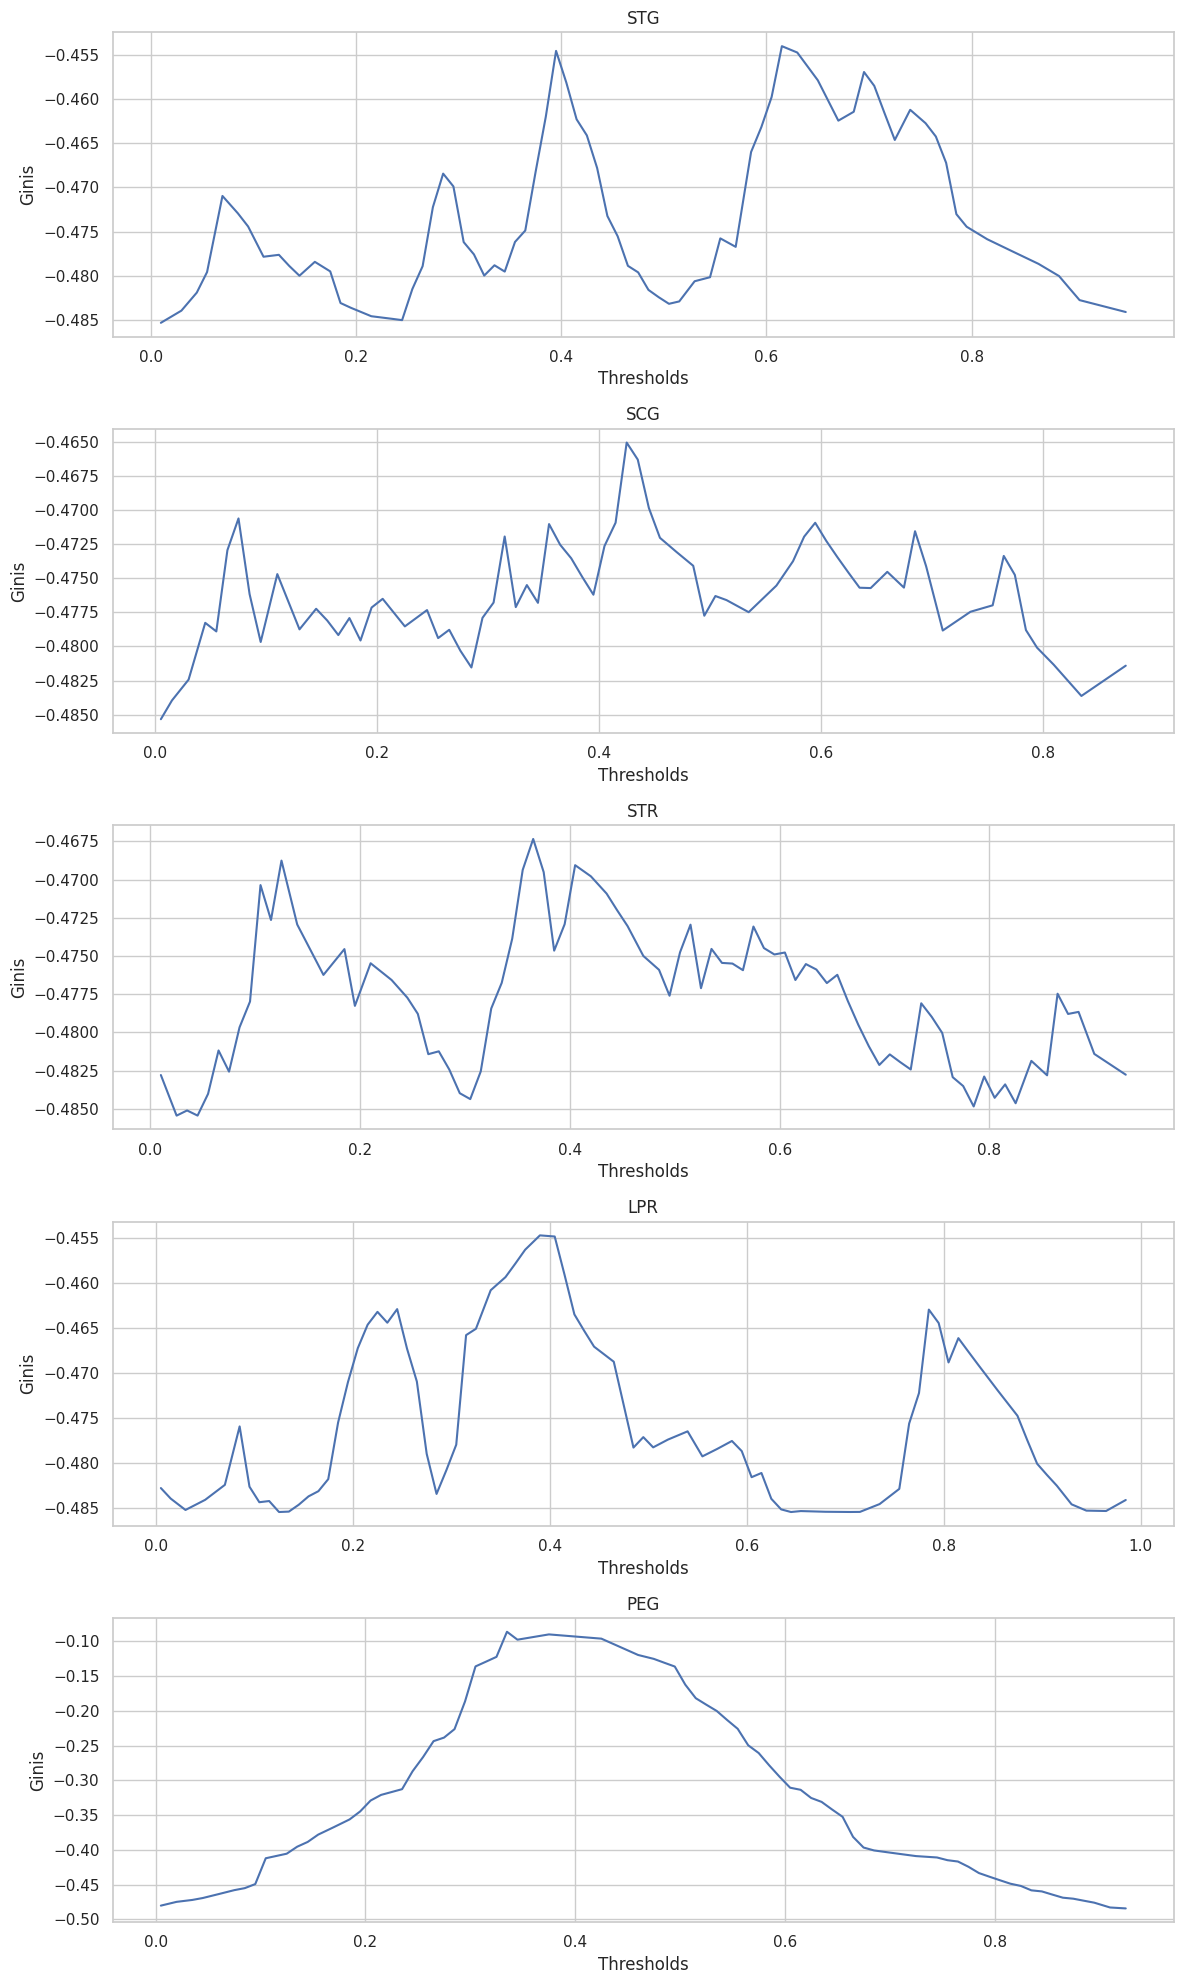

In [10]:
from hw5code import find_best_split


cols = ['STG', 'SCG', 'STR', 'LPR', 'PEG']
plt.figure(figsize=(12, 20))

it = 1
for column in cols:
    thresholds, ginis, best_threshold, best_gini = find_best_split(data[column], data['UNS'])
    plt.subplot(len(cols), 1, it)
    plt.xlabel(f'Thresholds')
    plt.ylabel(f'Ginis')
    plt.title(column)
    ax = sns.lineplot(x=thresholds, y=ginis)
    it += 1
plt.tight_layout()
plt.show()

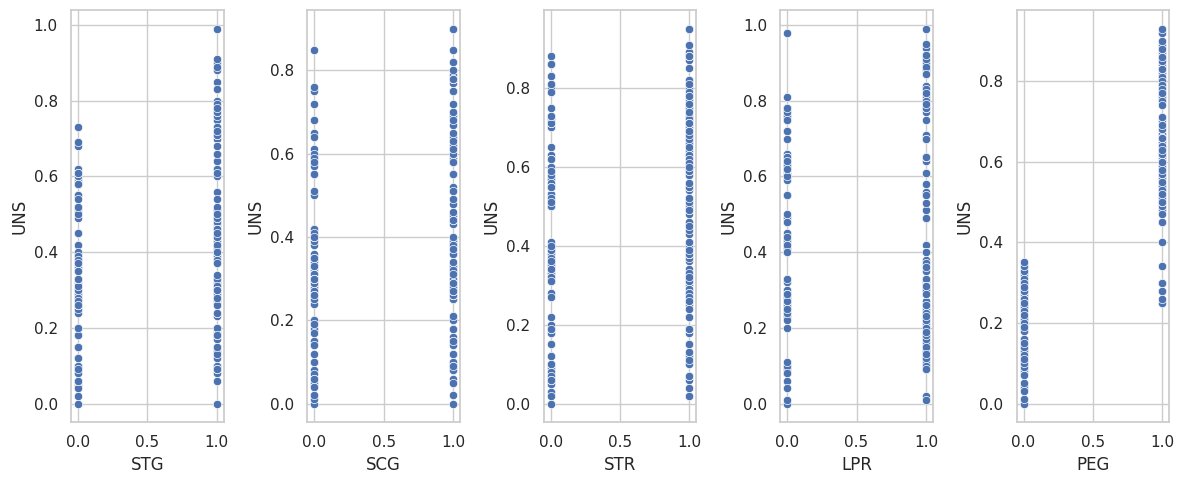

In [11]:
plt.figure(figsize=(12, 5))

it = 1
for column in cols:
    plt.subplot(1, len(cols), it)
    ax = sns.scatterplot(y=data[column], x=data['UNS'])
    plt.xlabel(column)
    plt.ylabel(f'UNS')
    it += 1

plt.tight_layout()
plt.show()

**Не знаю, зачем тут scatterplot, boxplot справился бы гораздо лучше мне кажется, если я правильно понимаю зачем мы такое строим.**

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ: Судя по кривым критерия Джини, самым лучшим признаком является PEG, так как у него самое максимально значение критерия (-0.1 против -0.45 у остальных в среднем). На scatterplotах это тоже видно, объекты очень хорошо разбиваются на две почти непересекающиеся подгруппы по этому признаку.<br>
Если выборка хорошо делится по признаку, то кривая для этого признака должна быть с четкой точкой максимума, как у PEG. Тогда мы явно можем найти границу, при которой разделение будет лучше всего. То есть кривая должна быть какая-то унимодальная. Если посмотреть на остальные признаки, то у них кривые в целом хаотичны, нельзя сказать что одна точка экстремума сильно лучше другой (это значит что в обеих точках мы переходим некие пороги по классификации признаков, то есть деление нечеткое).**

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [12]:
mushrooms = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', header=None)
mushrooms.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [13]:
from sklearn.preprocessing import LabelEncoder


mushrooms = mushrooms.apply(LabelEncoder().fit_transform)

In [14]:
from hw5code import DecisionTree

X = mushrooms.drop(columns=0)
y = mushrooms[0]
x_train, x_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.5, random_state=42)
dec_tree = DecisionTree(['categorical'] * x_train.shape[1])
y_pred = dec_tree.fit(x_train, y_train).predict(x_test)
print(f'Accuracy on test: {accuracy_score(y_test, y_pred):.4f}')
print(f'Max tree depth: {dec_tree._depth}')

Accuracy on test: 1.0000
Max tree depth: 8


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

In [15]:
tic_tac_toe = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data', header=None)
tic_tac_toe.head()

,0,1,2,3,4,5,6,7,8,9
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [16]:
tic_tac_toe = tic_tac_toe.apply(LabelEncoder().fit_transform)

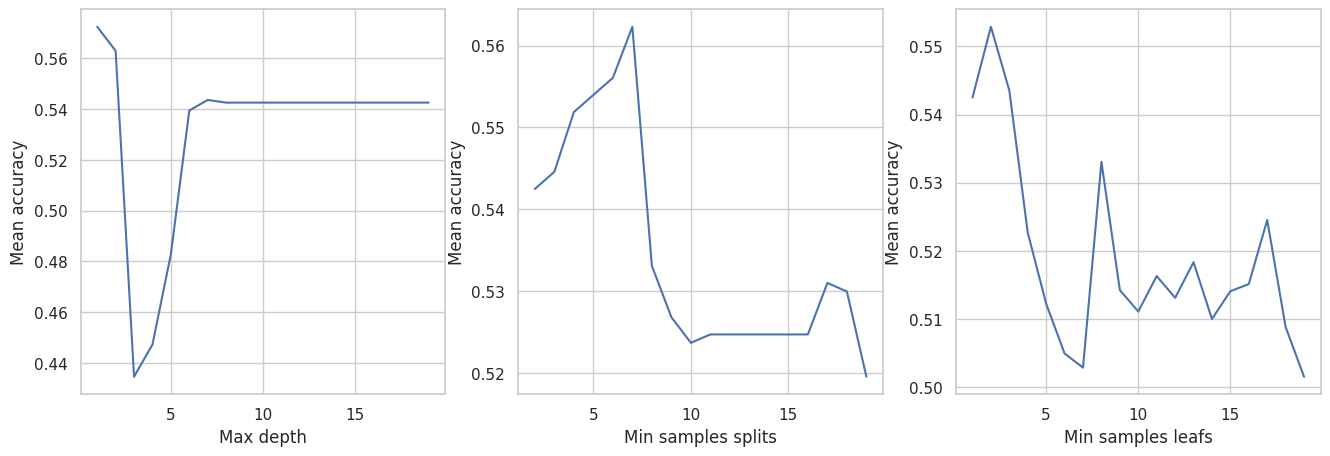

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer


max_depths = np.arange(1, 20)
min_samples_splits = np.arange(2, 20)
min_samples_leafs = np.arange(1, 20)

X = tic_tac_toe.drop(columns=9).to_numpy()
y = tic_tac_toe[9].to_numpy()

plt.figure(figsize=(16, 5))

scores = []
for val in max_depths:
    tree = DecisionTree(feature_types=['categorical'] * X.shape[1], max_depth=val)
    scores += [cross_val_score(tree, X, y, cv=10, scoring=make_scorer(accuracy_score)).mean()]
plt.subplot(1, 3, 1)
ax = sns.lineplot(x=max_depths, y=scores)
ax.set(xlabel='Max depth', ylabel='Mean accuracy')

scores = []
for val in min_samples_splits:
    tree = DecisionTree(feature_types=['categorical'] * X.shape[1], min_samples_split=val)
    scores += [cross_val_score(tree, X, y, cv=10, scoring=make_scorer(accuracy_score)).mean()]
plt.subplot(1, 3, 2)
ax = sns.lineplot(x=min_samples_splits, y=scores)
ax.set(xlabel='Min samples splits', ylabel='Mean accuracy')

scores = []
for val in min_samples_leafs:
    tree = DecisionTree(feature_types=['categorical'] * X.shape[1], min_samples_leaf=val)
    scores += [cross_val_score(tree, X, y, cv=10, scoring=make_scorer(accuracy_score)).mean()]
plt.subplot(1, 3, 3)
ax = sns.lineplot(x=min_samples_leafs, y=scores)
ax.set(xlabel='Min samples leafs', ylabel='Mean accuracy')
plt.show()

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [18]:
cars = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', header=None)
cars.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [19]:
cars[6] = np.where((cars[6] == 'unacc') | (cars[6] == 'acc'), 0, 1)
cars = cars.apply(LabelEncoder().fit_transform)

In [20]:
nursery = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data', header=None)
nursery.head()

,0,1,2,3,4,5,6,7,8
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


In [21]:
nursery[8] = np.where((nursery[8] == 'not_recom') | (nursery[8] == 'recommend'), 0, 1)
nursery = nursery.apply(LabelEncoder().fit_transform)

In [22]:
from sklearn.preprocessing import OneHotEncoder


res = pd.DataFrame()

In [23]:
X = mushrooms.drop(columns=0).to_numpy()
y = mushrooms[0].to_numpy()

tree = DecisionTree(feature_types=['real'] * X.shape[1])
res.loc['mushrooms', 'numerical'] = cross_val_score(tree, X, y, cv=10, scoring=make_scorer(accuracy_score)).mean()

tree = DecisionTree(feature_types=['categorical'] * X.shape[1])
res.loc['mushrooms', 'categorical'] = cross_val_score(tree, X, y, cv=10, scoring=make_scorer(accuracy_score)).mean()

encoded_x = OneHotEncoder(sparse=False).fit_transform(X)
tree = DecisionTree(feature_types=['real'] * encoded_x.shape[1])
res.loc['mushrooms', 'ohe_numerical'] = cross_val_score(tree, encoded_x, y, cv=10, scoring=make_scorer(accuracy_score)).mean()

tree = DecisionTreeClassifier(random_state=42)
res.loc['mushrooms', 'sklearn'] = cross_val_score(tree, X, y, cv=10, scoring=make_scorer(accuracy_score)).mean()

In [24]:
X = tic_tac_toe.drop(columns=9).to_numpy()
y = tic_tac_toe[9].to_numpy()

tree = DecisionTree(feature_types=['real'] * X.shape[1])
res.loc['tic_tac_toe', 'numerical'] = cross_val_score(tree, X, y, cv=10, scoring=make_scorer(accuracy_score)).mean()

tree = DecisionTree(feature_types=['categorical'] * X.shape[1])
res.loc['tic_tac_toe', 'categorical'] = cross_val_score(tree, X, y, cv=10, scoring=make_scorer(accuracy_score)).mean()

encoded_x = OneHotEncoder(sparse=False).fit_transform(X)
tree = DecisionTree(feature_types=['real'] * encoded_x.shape[1])
res.loc['tic_tac_toe', 'ohe_numerical'] = cross_val_score(tree, encoded_x, y, cv=10, scoring=make_scorer(accuracy_score)).mean()

tree = DecisionTreeClassifier(random_state=42)
res.loc['tic_tac_toe', 'sklearn'] = cross_val_score(tree, X, y, cv=10, scoring=make_scorer(accuracy_score)).mean()

In [25]:
X = cars.drop(columns=6).to_numpy()
y = cars[6].to_numpy()

tree = DecisionTree(feature_types=['real'] * X.shape[1])
res.loc['cars', 'numerical'] = cross_val_score(tree, X, y, cv=10, scoring=make_scorer(accuracy_score)).mean()

tree = DecisionTree(feature_types=['categorical'] * X.shape[1])
res.loc['cars', 'categorical'] = cross_val_score(tree, X, y, cv=10, scoring=make_scorer(accuracy_score)).mean()

encoded_x = OneHotEncoder(sparse=False).fit_transform(X)
tree = DecisionTree(feature_types=['real'] * encoded_x.shape[1])
res.loc['cars', 'ohe_numerical'] = cross_val_score(tree, encoded_x, y, cv=10, scoring=make_scorer(accuracy_score)).mean()

tree = DecisionTreeClassifier(random_state=42)
res.loc['cars', 'sklearn'] = cross_val_score(tree, X, y, cv=10, scoring=make_scorer(accuracy_score)).mean()

In [26]:
X = nursery.drop(columns=8).to_numpy()
y = nursery[8].to_numpy()

tree = DecisionTree(feature_types=['real'] * X.shape[1])
res.loc['nursery', 'numerical'] = cross_val_score(tree, X, y, cv=10, scoring=make_scorer(accuracy_score)).mean()

tree = DecisionTree(feature_types=['categorical'] * X.shape[1])
res.loc['nursery', 'categorical'] = cross_val_score(tree, X, y, cv=10, scoring=make_scorer(accuracy_score)).mean()

encoded_x = OneHotEncoder(sparse=False).fit_transform(X)
tree = DecisionTree(feature_types=['real'] * encoded_x.shape[1])
res.loc['nursery', 'ohe_numerical'] = cross_val_score(tree, encoded_x, y, cv=10, scoring=make_scorer(accuracy_score)).mean()

tree = DecisionTreeClassifier(random_state=42)
res.loc['nursery', 'sklearn'] = cross_val_score(tree, X, y, cv=10, scoring=make_scorer(accuracy_score)).mean()

In [27]:
res

,numerical,categorical,ohe_numerical,sklearn
mushrooms,0.999261,1.000000,0.999631,0.960384
tic_tac_toe,0.467533,0.542500,0.544616,0.771678
cars,0.942647,0.967546,0.919495,0.942707
nursery,0.999691,0.999846,0.999537,0.999691


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента.
Одинаково ли для разных наборов данных ранжируются алгоритмы?
Порассуждайте, почему так происходит.

Обратите внимание на значение признаков в разных наборах данных.
Присутствует ли в результатах какая-то компонента случайности?
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ: В целом везде побеждает, либо не хуже остальных, кодирование всех признаков как категориальных. Использование всех признаков как вещественных, с последующим OneHot кодированием выглядит немного бессмысленно (мы же не сохраняем зависимости значений от влияния на целевую переменную внутри каждого признака). А так как признаки категориальные, очевидно что соответствующее кодирование даст лучшие результаты. В среднем зависимость выглядит так: categorical -> sklearn -> ohe_numerical -> numerical. Все модели обучаются без элементов случайности, кроме sklearn (иначе зачем ему random_state).**

Вставьте что угодно, описывающее ваши впечатления от этого задания:

![](https://sun9-12.userapi.com/impg/eNmwCVL4RSoGh1ohp2VCUrCsWYQ0Qul7OsEwkg/VV7bX7QOEPY.jpg?size=583x604&quality=95&sign=114a5471232f8a9e1d9b5fe9fdacf62c&c_uniq_tag=NJ4dwYgbTdyM_cRDaM_N4225W9q4lMy9fZBsB4Cs5rs&type=album)
